In [1]:
# 
# Script that compares four time-series of daily deaths in Spain.
# The data corresponds to:
# - expected daily deaths, at 99% confidence interval,
# - expected daily deaths, average (median?),
# - actual daily deaths, due to all causes,
# - actual daily deaths, reportedly due to covid19.
# The period of comparison varies:
# - from actual exceeding expected_99pc (20200317),
# - from actual exceeding expected_average (20200310).
# The sources of the data are:
# - https://momo.isciii.es/public/momo/dashboard/momo_dashboard.html#datos
# - for the reported covid deaths: https://covid19.isciii.es/.
# The original csv files have been cleaned and merged into a single input data file.
# The data is numeric formed by pairs in two columns which correspond to a date (X) and a value (Y).
# The script integrates both sets of data, and substracts one from the other.
# The data correspond to the observed daily deaths and the expected 99% interval. 
# The difference, therefore, gives the excess deaths above the expected 99% threshold.
# The source of the data is: https://www.isciii.es/QueHacemos/Servicios/VigilanciaSaludPublicaRENAVE/EnfermedadesTransmisibles/MoMo/Paginas/Informes-MoMo-2020.aspx
# The chart has been digitized with WebPlotDigitizer.
#

In [36]:
# Version log.
#
# R0 (20200412):
# First trials.
# Seems to work well.
#
# R1 (20200413):
# Adds average and covid deaths.
# Covid deaths data from: https://github.com/CSSEGISandData/COVID-19.
#
# R2 (20200416)
# All data from daily reports, so no integration needed (only summation) and all data together in one IO file.
# Version for github.


In [65]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


In [66]:
# Directories.
RootDir = 'D:/0 DOWN/00 PY RG/COVID/EXCESS_DEATHS/IO Data/'

# I/O files:
FileNameIn1 = RootDir + 'MoMo_and_covid_data_20200415_clean.csv'


In [67]:
# Read data.
df = pd.read_csv(FileNameIn1)

# Take a look:
df


,DATE,AVER,99PC,ACTUAL,C_CUM,C_DAY
0,20/02/2020,1240.50,1641.650,1184,0.0,0.0
1,21/02/2020,1228.50,1608.390,1157,0.0,0.0
2,22/02/2020,1218.50,1608.390,1173,0.0,0.0
3,23/02/2020,1217.50,1608.390,1088,0.0,0.0
4,24/02/2020,1217.50,1608.390,1141,0.0,0.0
5,25/02/2020,1215.00,1623.360,1124,0.0,0.0
6,26/02/2020,1213.00,1610.250,1126,0.0,0.0
7,27/02/2020,1206.50,1610.250,1219,0.0,0.0
8,28/02/2020,1206.50,1591.620,1124,0.0,0.0
9,29/02/2020,1208.00,1565.400,1142,0.0,0.0


In [69]:
# Add date in datetime format:
df['DATE1'] = pd.to_datetime(df.DATE, format =  '%d/%m/%Y')


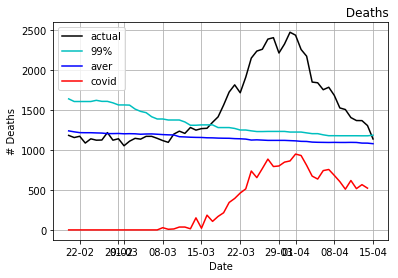

In [70]:
# Create the charts - daily deaths
fig, ax = plt.subplots()
ax.plot(df['DATE1'], df['ACTUAL'], c = 'k', label='actual')
ax.plot(df['DATE1'], df['99PC'  ], c = 'c', label='99%')
ax.plot(df['DATE1'], df['AVER'  ], c = 'b', label='aver')
ax.plot(df['DATE1'], df['C_DAY' ], c = 'r', label='covid')

ax.xaxis.set_major_formatter(DateFormatter("%d-%m"))
ax.legend()
ax.set_title(' Deaths', loc = 'right')
ax.set_xlabel('Date')
ax.set_ylabel('# Deaths')
ax.grid(True)
plt.show()


In [72]:
# Compute the differences with the 99% estimate and integrate.

# Auxiliary dataframe with cumulated results:
df_99 = df.loc[:, ('DATE1','ACTUAL', '99PC')]
df_99['dif_99'] = df_99['ACTUAL'] - df_99['99PC']

# Remove the data for the dates where the actual was below the 99pc:
df_99.drop(df_99[df_99['dif_99'] <= 0 ].index , inplace=True)

# Create the cumulated data from that condition:
df_99['CUM'] = df_99['dif_99'].cumsum()

# Take a look:
df_99


,DATE1,ACTUAL,99PC,dif_99,CUM
26,2020-03-17,1348,1315.555,32.445,32.445
27,2020-03-18,1416,1281.955,134.045,166.490
28,2020-03-19,1564,1281.955,282.045,448.535
29,2020-03-20,1727,1281.955,445.045,893.580
30,2020-03-21,1817,1270.915,546.085,1439.665
31,2020-03-22,1718,1251.325,466.675,1906.340
32,2020-03-23,1913,1251.325,661.675,2568.015
33,2020-03-24,2152,1240.720,911.280,3479.295
34,2020-03-25,2240,1232.170,1007.830,4487.125
35,2020-03-26,2263,1232.170,1030.830,5517.955


In [73]:
# Compute the differences with the central (average/median) estimate and integrate.

# Auxiliary dataframe with cumulated results:
df_av = df.loc[:, ('DATE1','ACTUAL', 'AVER')]
df_av['dif_av'] = df_av['ACTUAL'] - df_av['AVER']

# Remove the data for the dates where the actual was below the average:
df_av.drop(df_av[df_av['dif_av'] <= 0 ].index , inplace=True)

# Create the cumulated data from that condition:
df_av['CUM'] = df_av['dif_av'].cumsum()

# Take a look:
df_av


,DATE1,ACTUAL,AVER,dif_av,CUM
7,2020-02-27,1219,1206.50,12.50,12.50
19,2020-03-10,1200,1189.50,10.50,23.00
20,2020-03-11,1237,1167.50,69.50,92.50
21,2020-03-12,1209,1164.50,44.50,137.00
22,2020-03-13,1283,1161.00,122.00,259.00
23,2020-03-14,1250,1159.00,91.00,350.00
24,2020-03-15,1269,1158.00,111.00,461.00
25,2020-03-16,1273,1154.00,119.00,580.00
26,2020-03-17,1348,1153.00,195.00,775.00
27,2020-03-18,1416,1150.00,266.00,1041.00


In [85]:
# Prepare the covid deaths data.
# Auxiliary dataframe with cumulated results:
df_co = df.loc[:, ('DATE1','C_CUM', 'C_DAY')]

# Remove the data for the dates where there is no count:
df_co.drop(df_co[df_co['C_CUM'] <= 0 ].index , inplace=True)

# Take a look:
df_co


,DATE1,C_CUM,C_DAY
17,2020-03-08,28.0,28.0
18,2020-03-09,36.0,8.0
19,2020-03-10,48.0,12.0
20,2020-03-11,84.0,36.0
21,2020-03-12,120.0,36.0
22,2020-03-13,134.0,14.0
23,2020-03-14,285.0,151.0
24,2020-03-15,306.0,21.0
25,2020-03-16,491.0,185.0
26,2020-03-17,598.0,107.0


In [82]:
# Compute the differences with the central (average/median) estimate rebased to the covid dates.

# Auxiliary dataframe with cumulated results:
df_av2 = df.loc[:, ('DATE1','ACTUAL', 'AVER')]
df_av2['dif_av'] = df_av2['ACTUAL'] - df_av2['AVER']

# Remove the data for the dates before covid deaths started to be reported:
df_av2.drop(df_av2[df_av2['DATE1'] < df_co.iloc[0,0] ].index , inplace=True)

# Create the cumulated data from that condition:
df_av2['CUM'] = df_av2['dif_av'].cumsum()

# Take a look:
df_av2


,DATE1,ACTUAL,AVER,dif_av,CUM
17,2020-03-08,1119,1194.00,-75.00,-75.00
18,2020-03-09,1097,1191.00,-94.00,-169.00
19,2020-03-10,1200,1189.50,10.50,-158.50
20,2020-03-11,1237,1167.50,69.50,-89.00
21,2020-03-12,1209,1164.50,44.50,-44.50
22,2020-03-13,1283,1161.00,122.00,77.50
23,2020-03-14,1250,1159.00,91.00,168.50
24,2020-03-15,1269,1158.00,111.00,279.50
25,2020-03-16,1273,1154.00,119.00,398.50
26,2020-03-17,1348,1153.00,195.00,593.50


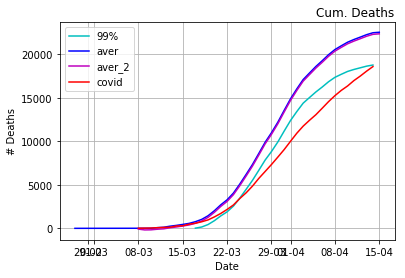

In [84]:
# Create the charts - cumulated deaths
fig, ax = plt.subplots()
ax.plot(df_99 ['DATE1'], df_99 ['CUM'  ], c = 'c', label='99%')
ax.plot(df_av ['DATE1'], df_av ['CUM'  ], c = 'b', label='aver')
ax.plot(df_av2['DATE1'], df_av2['CUM'  ], c = 'm', label='aver_2')
ax.plot(df_co ['DATE1'], df_co ['C_CUM'], c = 'r', label='covid')

ax.xaxis.set_major_formatter(DateFormatter("%d-%m"))
ax.legend()
ax.set_title ('Cum. Deaths', loc = 'right')
ax.set_xlabel('Date')
ax.set_ylabel('# Deaths')
ax.grid(True)
plt.show()


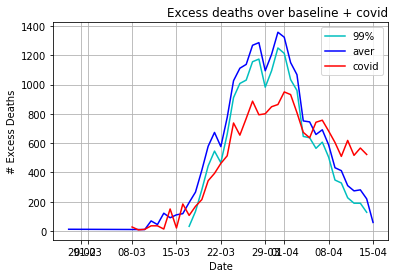

In [87]:
# Create the charts - daily excess
fig, ax = plt.subplots()
ax.plot(df_99['DATE1'], df_99['dif_99'], c = 'c', label='99%')
ax.plot(df_av['DATE1'], df_av['dif_av'], c = 'b', label='aver')
ax.plot(df_co['DATE1'], df_co['C_DAY' ], c = 'r', label='covid')

ax.xaxis.set_major_formatter(DateFormatter("%d-%m"))
ax.legend()
ax.set_title('Excess deaths over baseline + covid', loc = 'right')
ax.set_xlabel('Date')
ax.set_ylabel('# Excess Deaths')
ax.grid(True)
plt.show()
